In [1]:
# first import libs
import pandas as pd
import numpy as np
import seaborn as sns

# Q1 create a csv file

In [2]:
f = pd.DataFrame([[427.0,221.0,212.0,503.0,1841.0], 
                  [62.0,12.0,20.0,102.0,305.0],
                  [np.nan, np.nan, np.nan, np.nan, np.nan],
                  [694.0,4840.0,383.0,320.0,201.0],
                  [117.0,415.0,65.0,129.0,61.0]
                 ],
                    index = [['ALASKA', 'ALASKA', '' , 'AM WEST', 'AM WEST'], 
                             ['on time', 'delayed', '' , 'on time', 'delayed']],
                    columns=['Los Angeles','Phoenix','San Diego','San Francisco','Seattele'])
f

Los Angeles  Phoenix  San Diego  San Francisco  Seattele
ALASKA  on time        427.0    221.0      212.0          503.0    1841.0
        delayed         62.0     12.0       20.0          102.0     305.0
                         NaN      NaN        NaN            NaN       NaN
AM WEST on time        694.0   4840.0      383.0          320.0     201.0
        delayed        117.0    415.0       65.0          129.0      61.0

In [3]:
f.to_csv('./data/M10_data.csv', index=True)

# Q2 load a csv file from github

In [4]:
# To read the M10_data and get the DataFrame.
m10_file = "https://raw.githubusercontent.com/Yuehao-Wang/AIM-5001/master/data/M10_data.csv"
m10_df = pd.read_csv(m10_file)

# To see the head of Unnameddata set
m10_df.head()

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattele
0,ALASKA,on time,427.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AM WEST,delayed,117.0,415.0,65.0,129.0,61.0


#### rename colums

In [5]:
# rename the column 1 and column 2
m10_df = m10_df.rename(columns={'Unnamed: 0':'airline', 'Unnamed: 1':'arr'})
m10_df

,airline,arr,Los Angeles,Phoenix,San Diego,San Francisco,Seattele
0,ALASKA,on time,427.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AM WEST,delayed,117.0,415.0,65.0,129.0,61.0


#### remove the NaN values

In [6]:
# remove the NaN values by dropna()
m10_df = m10_df.dropna()
m10_df

,airline,arr,Los Angeles,Phoenix,San Diego,San Francisco,Seattele
0,ALASKA,on time,427.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AM WEST,delayed,117.0,415.0,65.0,129.0,61.0


#### set a multiple index with airline and arr

In [7]:
# set a multiple index by set_index
idx_m10_df = m10_df.set_index(['airline', 'arr'])
idx_m10_df

Los Angeles  Phoenix  San Diego  San Francisco  Seattele
airline arr                                                              
ALASKA  on time        427.0    221.0      212.0          503.0    1841.0
        delayed         62.0     12.0       20.0          102.0     305.0
AM WEST on time        694.0   4840.0      383.0          320.0     201.0
        delayed        117.0    415.0       65.0          129.0      61.0

#### show as a long format

In [8]:
# using stack to convert a long format
long_m10_df = pd.DataFrame(idx_m10_df.stack())
long_m10_df

0
airline arr                          
ALASKA  on time Los Angeles     427.0
                Phoenix         221.0
                San Diego       212.0
                San Francisco   503.0
                Seattele       1841.0
        delayed Los Angeles      62.0
                Phoenix          12.0
                San Diego        20.0
                San Francisco   102.0
                Seattele        305.0
AM WEST on time Los Angeles     694.0
                Phoenix        4840.0
                San Diego       383.0
                San Francisco   320.0
                Seattele        201.0
        delayed Los Angeles     117.0
                Phoenix         415.0
                San Diego        65.0
                San Francisco   129.0
                Seattele         61.0

We now have the data in long format.

- 

# Q3

#### Q3.1 For each city, which airline had the best on time performance?

In [9]:
m10_df

,airline,arr,Los Angeles,Phoenix,San Diego,San Francisco,Seattele
0,ALASKA,on time,427.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AM WEST,delayed,117.0,415.0,65.0,129.0,61.0


In [10]:
# transfer to a long table
aa_m10_df = pd.melt(m10_df, id_vars=['airline','arr'])
aa_m10_df

,airline,arr,variable,value
0,ALASKA,on time,Los Angeles,427.0
1,ALASKA,delayed,Los Angeles,62.0
2,AM WEST,on time,Los Angeles,694.0
3,AM WEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AM WEST,on time,Phoenix,4840.0
7,AM WEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


In [11]:
# get the on time sub dataset
ontime_m10_df = aa_m10_df[aa_m10_df['arr'] == 'on time']
ontime_m10_df

,airline,arr,variable,value
0,ALASKA,on time,Los Angeles,427.0
2,AM WEST,on time,Los Angeles,694.0
4,ALASKA,on time,Phoenix,221.0
6,AM WEST,on time,Phoenix,4840.0
8,ALASKA,on time,San Diego,212.0
10,AM WEST,on time,San Diego,383.0
12,ALASKA,on time,San Francisco,503.0
14,AM WEST,on time,San Francisco,320.0
16,ALASKA,on time,Seattele,1841.0
18,AM WEST,on time,Seattele,201.0


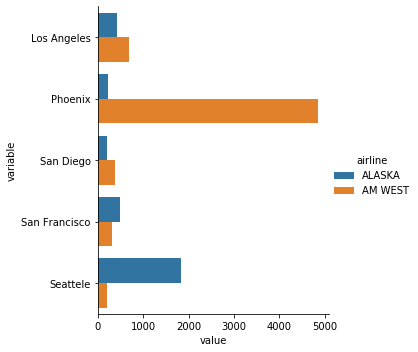

In [12]:
# using bar chart to illustrate
sns.catplot(x="value", y="variable", hue="airline", kind="bar", data=ontime_m10_df)

The above description and bar chart shows as following.
- The figure for arrival on times of AM WEST is larger than the figure for ALASKA in Los Angeles, with 694 and 427 respectively.
- The number of arrival on times of AM WEST (4840) is over 22 times larger than the number of ALASKA (221) in Phoenix.
- In San Diego, AM WEST has a better number of arrival on times (383) than ALASKA (212).
- ALASKA has a better number of arrival on times than AM WEST in San Francisco, with 503 and 302 respectively.
- The number of arrival on times of ALASKA (1841) is AROUND 9 times larger than the number of ALASKA (201) in Seattle.

#### Q3.2 Which airline had the best overall on time performance?

In [13]:
ontime_m10_df.groupby(['airline']).mean()

,value
airline,
ALASKA,640.8
AM WEST,1287.6


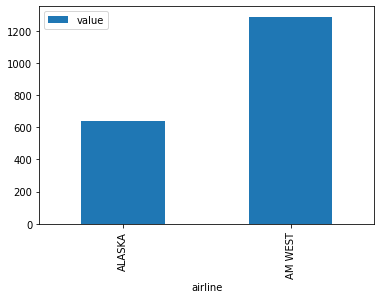

In [14]:
ontime_m10_df.groupby(['airline']).mean().plot.bar()

The above table and bar chart show that AM WEST has the best overall on time performance.

# Q4